<img src="images/upGrad.png" alt="upGrad" align="Left" style="width: 200px;"/>
<img src="images/IIITB.jpeg" alt="IITB" align="Right" style="width: 200px;"/>

# Lead Scoring Case Study

<b>Author:</b> Anish Mahapatra, Karthik Premanand

<i>Machine Learning I > Group Case Study I </i>

# Problem Statement

The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. Target lead conversion rate to be around 80%.

### Goals of case Study:
- Build logistic regression model to assign score between 0 and 100
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well

### Evaluation Rubric:
- Data Quality Checks Performed
- Dummy Variables Created
- Feature Engineering, if required
- Clean Analytical Dataset
- Tuning model parameters
- Correct variable selection technique
- Model Evaluation
- Model explained properly
- Commented code to include brief explanantion of important variables and the model in simple terms

- handle the slect as missing values
- Missing values greater than 40% should not be dropped - Drop Assymetrique cols with 45% missing values
- Check the columns for the number of distinct values
- Do EDA

**Modelling:**
- Use RFE, select the best columns
- Build logistic regression model with good sensitivity
- Check p-value and VIF
- Find optimal probability cut-off
- generate score variable (Customer ID, Probability, Score)

Evaluation: Sensitivity, Precision and Accuracy

In [1]:
# Importing the required packages

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
%matplotlib inline
import warnings

In [2]:
# Removing the minimum display columns to 500
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# Ignoring warnings
warnings.filterwarnings("ignore")

In [3]:
# Reading the .csv as a pandas dataframe
leadsData = pd.read_csv("Data/Leads.csv")

In [4]:
# Sense Check of the Data
leadsData.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# Viewing the shape of the data
leadsData.shape

(9240, 37)

In [6]:
# Information about the data
leadsData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [7]:
# Sense Check of the Data
leadsData.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


We have 9240 rows and 37 columns of string(30), integer(3) and float(4) data.

Analyzing the data and the data dictionary, here are a few observations regarding the data:

**Unique Identifiers (to be analyzed)**:
1. Prospect ID
2. Lead Number

**The primary key of the data**:
1. Last Notable Activity (One-hot encoding)

**One-hot encoding can be performed on**: 
1. Lead Origin 
2. Lead Source
3. Last Activity
4. Country
5. Specialization
6. How did you hear about X Education
7. What is your current occupation
8. What matters most to you in choosing a course
9. Tags
10. Lead Profile
11. City
12. Asymmetrique Activity Index
13. Asymmetrique Profile Index

**Ordinal Categorical Variables**: 
1. Lead Quality

**Binary Conversion of Yes and No can be used**:
1. Do Not Email
2. Do Not Call
3. Search
4. Magazine
5. Newspaper Article
6. X Education Forums
7. Newspaper
8. Digital Advertisement
8. Through Recommendations
10. Recieve More Updates About Our Courses
11. Update me on Supply Chain Content
12. Get updates on DM Content
13. A free copy of Mastering The Interview

**Dependent Feature**: 
1. Converted

**Numeric Variables**:
1. TotalVisits
2. Total Time Spent on Website
3. Page Views Per Visit
4. Asymmetrique Activity Score
5. Asymmetrique Profile Score


### Columns that are not useful: (Reason: All "No" - no variance)
1. I agree to pay the amount through cheque 
2. Magazine
3. Receive More Updates About Our Courses
4. Update me on Supply Chain Content
5. Get updates on DM Content
6. I agree to pay the amount through cheque
7. A free copy of Mastering The Interview

In [8]:
df = leadsData.copy(deep = True)

#### Replacing the "Select" values with NaN

The columns that have "Select" are:
- Specialization
- How did you hear about X Education
- Lead Profile
- City

In [9]:
# List of variables to map
variableList =  ['Specialization', 'How did you hear about X Education', 'Lead Profile','City']

# Defining the map function
def null_map(x):
    return x.map({'Select': ""})

# Applying the function to the housing list
df[variableList] = leadsData[variableList].apply(null_map)

### Missing Value Analysis

In [10]:
# Calculating the percent of missing values in the dataframe
percentMissing = (df.isnull().sum() / len(df)) * 100

# Making a dataframe with the missing values % and columns into a dataframe (on account of large number of rows) 
missingValuesDf = pd.DataFrame({'Column Name': df.columns,
                                 'Percent of data missing': percentMissing})

In [11]:
# Viewing the missing
missingValuesDf

,Column Name,Percent of data missing
Prospect ID,Prospect ID,0.000000
Lead Number,Lead Number,0.000000
Lead Origin,Lead Origin,0.000000
Lead Source,Lead Source,0.389610
Do Not Email,Do Not Email,0.000000
Do Not Call,Do Not Call,0.000000
Converted,Converted,0.000000
TotalVisits,TotalVisits,1.482684
Total Time Spent on Website,Total Time Spent on Website,0.000000
Page Views Per Visit,Page Views Per Visit,1.482684


The rule of thumb that is followed here is that if the column has more than 10-13 % of the data missing, we shall delete the columns.

The columns that have missing data include the following:
1. Country (27%)
2. Specialization (79%)
3. How did you hear about X Education (45%)
4. What is your current occupation (29%)
5. What matters most to you in choosing a course (29%)
6. Tags (36%)
7. Lead Quality (51%)
8. Lead Profile (55%)
9. City (75%)
10. Asymmetrique Activity Index (46%)
11. Asymmetrique Profile Index (46%)
12. Asymmetrique Activity Score (46%)
13. Asymmetrique Profile Score (46%)

We have now removed 13 out of 37 columns on account of missing values, so we are left with 24 features now.

**We shall also proceed to remove the columns that have no variance:**
1. I agree to pay the amount through cheque 
2. Magazine
3. Receive More Updates About Our Courses
4. Update me on Supply Chain Content
5. Get updates on DM Content
6. I agree to pay the amount through cheque
7. A free copy of Mastering The Interview

In [12]:
df.shape

(9240, 37)

#### Dropping the columns that have over 20% missing values

In [13]:
# Dropping the selected columns that have missing values
df = df.drop(['Country', 'How did you hear about X Education', 'What is your current occupation',\
         'What matters most to you in choosing a course', 'Tags', 'Lead Quality', 'Lead Profile', 'City',\
         'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score',\
         'Asymmetrique Profile Score', 'Specialization'], axis = 1)

##### Dropping the columns that have no variance

In [14]:
# Dropping the selected columns that have no variance
df = df.drop(['I agree to pay the amount through cheque', 'Magazine', 'Receive More Updates About Our Courses',\
              'Update me on Supply Chain Content', 'Get updates on DM Content', 'I agree to pay the amount through cheque',\
              'A free copy of Mastering The Interview'], axis = 1)

### Outlier Analysis

Let us now analyze all the numerical columns of the dataset for outliers.

<b>Note:</b> The Boxplots below have been plotted with the standard whiskers of 1.5 x (IQR)

In [120]:
# Selecting only the numeric columns to perform correlation analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
df_num = leadsData.select_dtypes(include=numerics)

In [121]:
# Displaying the top 5 rows of only the numerical values
df_num.head()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
0,660737,0,0.0,0,0.0,15.0,15.0
1,660728,0,5.0,674,2.5,15.0,15.0
2,660727,1,2.0,1532,2.0,14.0,20.0
3,660719,0,1.0,305,1.0,13.0,17.0
4,660681,1,2.0,1428,1.0,15.0,18.0


In [122]:
# Viewing the columns of the data set
df_num.columns

Index(['Lead Number', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'Asymmetrique Activity Score', 'Asymmetrique Profile Score'],
      dtype='object')

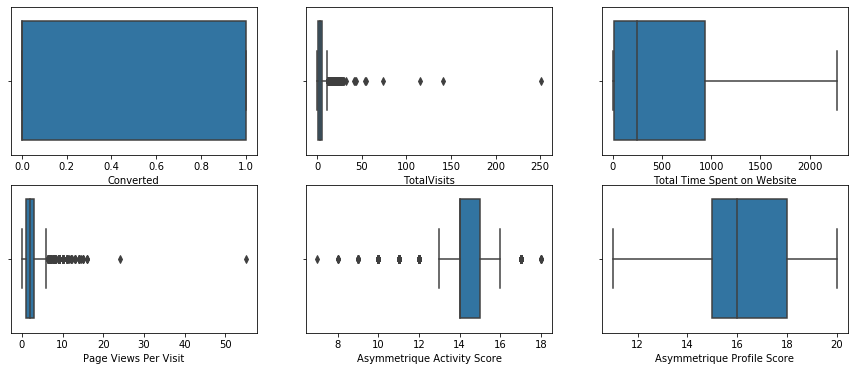

In [123]:
# Making boxplots as sub-plots to understand the trend of the data 
plt.figure(figsize=(15, 6))
plt.subplot(2,3,1)
sns.boxplot(x = 'Converted', data = df_num)
plt.subplot(2,3,2)
sns.boxplot(x = 'TotalVisits', data = df_num)
plt.subplot(2,3,3)
sns.boxplot(x = 'Total Time Spent on Website', data = df_num)
plt.subplot(2,3,4)
sns.boxplot(x = 'Page Views Per Visit', data = df_num)
plt.subplot(2,3,5)
sns.boxplot(x = 'Asymmetrique Activity Score', data = df_num)
plt.subplot(2,3,6)
sns.boxplot(x = 'Asymmetrique Profile Score', data = df_num)
plt.show()

In [15]:
# Viewing the shape of the data
df.shape

(9240, 18)

In [16]:
# Calculating the percent of missing values in the dataframe
percentMissing = (df.isnull().sum() / len(df)) * 100

# Making a dataframe with the missing values % and columns into a dataframe (on account of large number of rows) 
missingValuesDf = pd.DataFrame({'Column Name': df.columns,
                                 'Percent of data missing': percentMissing})

In [17]:
missingValuesDf

,Column Name,Percent of data missing
Prospect ID,Prospect ID,0.000000
Lead Number,Lead Number,0.000000
Lead Origin,Lead Origin,0.000000
Lead Source,Lead Source,0.389610
Do Not Email,Do Not Email,0.000000
Do Not Call,Do Not Call,0.000000
Converted,Converted,0.000000
TotalVisits,TotalVisits,1.482684
Total Time Spent on Website,Total Time Spent on Website,0.000000
Page Views Per Visit,Page Views Per Visit,1.482684


We have now removed the columns that have over 20% or more missing data for the analysis.

In [18]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,Modified


In [19]:
cols = df.columns.tolist()
cols

['Prospect ID',
 'Lead Number',
 'Lead Origin',
 'Lead Source',
 'Do Not Email',
 'Do Not Call',
 'Converted',
 'TotalVisits',
 'Total Time Spent on Website',
 'Page Views Per Visit',
 'Last Activity',
 'Search',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Last Notable Activity']

In [20]:
cols = ['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call', 'TotalVisits',\
         'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity', 'Search', 'Newspaper Article',\
        'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Last Notable Activity',\
       'Converted',]

In [21]:
df = df[cols]

In [22]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Last Notable Activity,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0.0,0,0.0,Page Visited on Website,No,No,No,No,No,No,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,5.0,674,2.5,Email Opened,No,No,No,No,No,No,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,2.0,1532,2.0,Email Opened,No,No,No,No,No,No,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,1.0,305,1.0,Unreachable,No,No,No,No,No,No,Modified,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,2.0,1428,1.0,Converted to Lead,No,No,No,No,No,No,Modified,1


In [23]:
df.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Last Notable Activity', 'Converted'],
      dtype='object')

In the following columns we shall convert the Yes to 1 and No to 0:
- Do Not Email, Do Not Call, Search, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations

#### Mapping and dummy one-hot encoding

In [24]:
# List of variables to map

variableList =  ['Do Not Email', 'Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper',\
                 'Digital Advertisement', 'Through Recommendations']

# Defining the map function
def binary_map(x):
    return x.map({'Yes': 1, 'No': 0})

# Applying the function to the housing list
df[variableList] = df[variableList].apply(binary_map)

In [25]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Last Notable Activity,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,Modified,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,Email Opened,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,Email Opened,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,Modified,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,Modified,1


Following is the list of categorical variables to perform one-hot encoding on by creating dummy variables:
- Lead Origin, Lead Source, Last Activity, Last Notable Activity

In [26]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummyVariables = pd.get_dummies(df[['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity']], drop_first = True)

# Adding the results to the master dataframe
df = pd.concat([df, dummyVariables], axis=1)

In [27]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Last Notable Activity,Converted,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,0,0,0.0,0,0.0,Page Visited on Website,0,0,0,0,0,0,Modified,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,0,0,5.0,674,2.5,Email Opened,0,0,0,0,0,0,Email Opened,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,0,0,2.0,1532,2.0,Email Opened,0,0,0,0,0,0,Email Opened,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,0,0,1.0,305,1.0,Unreachable,0,0,0,0,0,0,Modified,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,0,0,2.0,1428,1.0,Converted to Lead,0,0,0,0,0,0,Modified,1,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


In [28]:
# Dropping the categorical variables as dummy variables have been created
df = df.drop(['Lead Origin', 'Lead Source', 'Last Activity', 'Last Notable Activity'], axis = 1)

# Dropping the 'Lead Number' column as well as we already have the unique identifier
df = df.drop(['Lead Number'], axis = 1)

In [29]:
# Viewing the shape of the data
df.shape

(9240, 68)

In [30]:
# Popping out the converted column
converted = df.pop('Converted')

# Adding the column back to the dataframe
df = pd.concat([df, converted], axis=1)

In [31]:
df.head()

,Prospect ID,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [32]:
# Viewing the information of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 68 columns):
Prospect ID                                           9240 non-null object
Do Not Email                                          9240 non-null int64
Do Not Call                                           9240 non-null int64
TotalVisits                                           9103 non-null float64
Total Time Spent on Website                           9240 non-null int64
Page Views Per Visit                                  9103 non-null float64
Search                                                9240 non-null int64
Newspaper Article                                     9240 non-null int64
X Education Forums                                    9240 non-null int64
Newspaper                                             9240 non-null int64
Digital Advertisement                                 9240 non-null int64
Through Recommendations                               9240 non-null int64


#### Removing Highly correlated variables

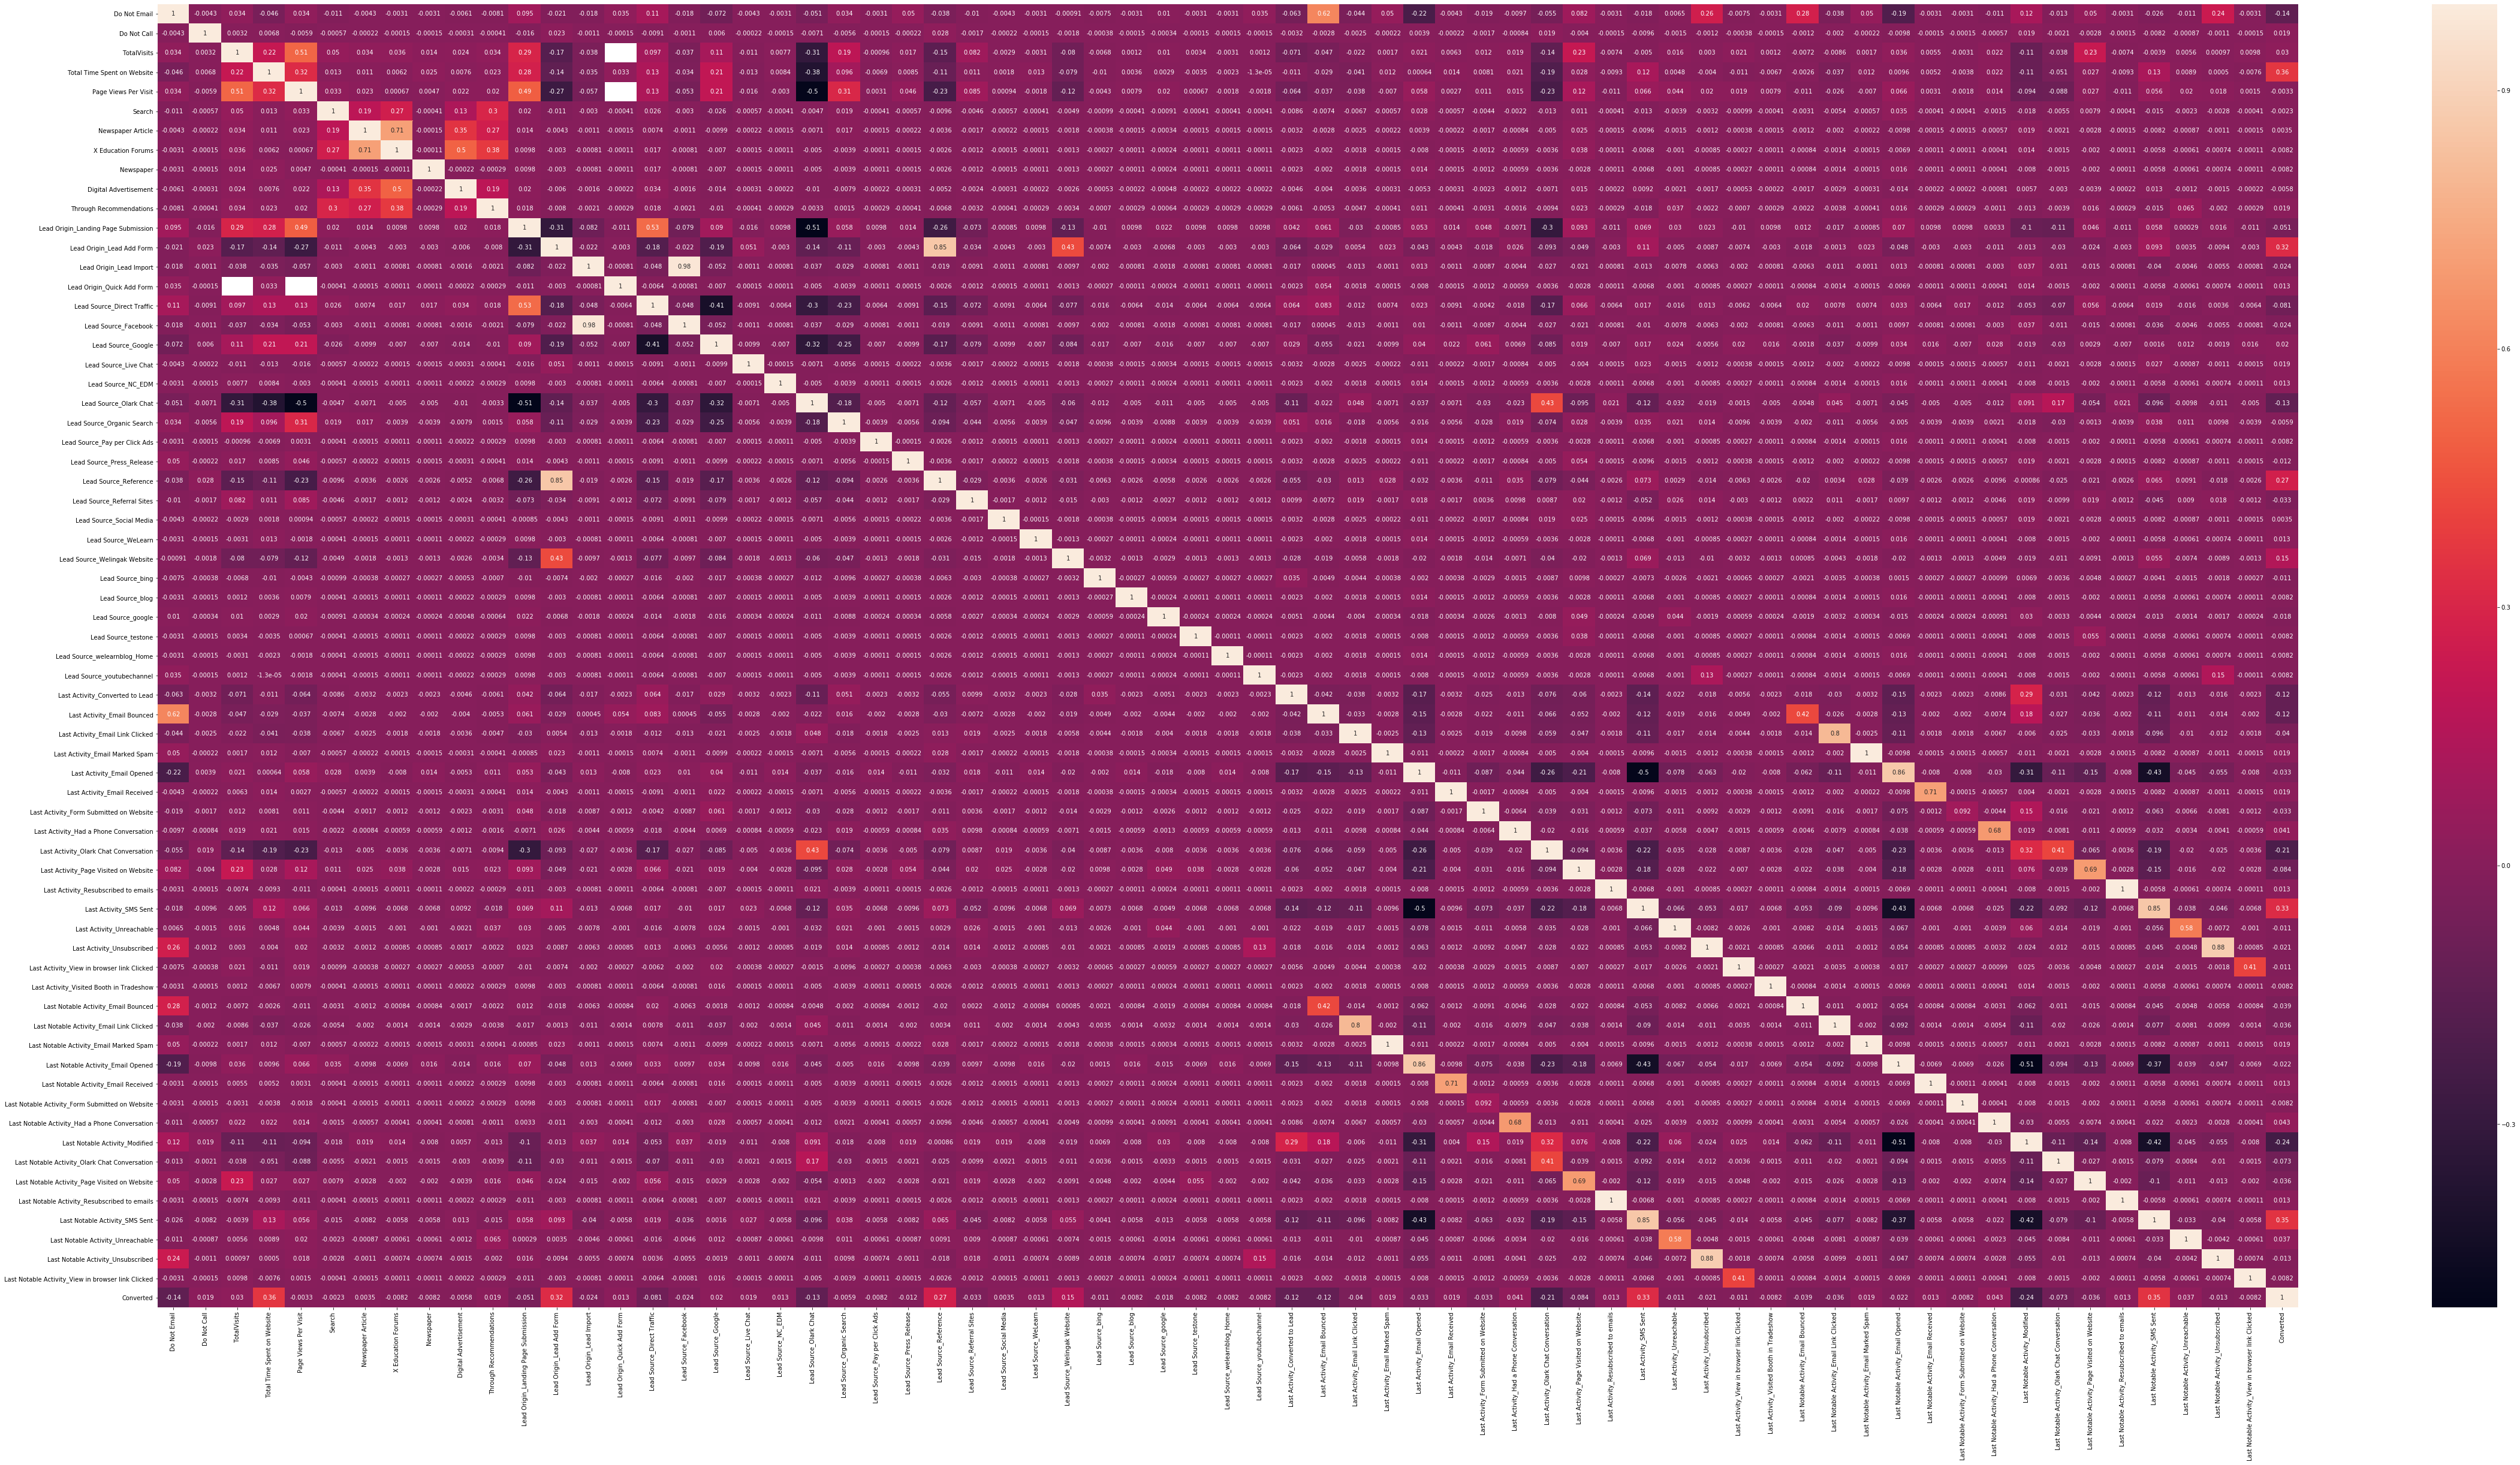

In [33]:
# Selecting only the numeric columns to perform correlation analysis
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64', 'uint8']
df_num = df.select_dtypes(include=numerics)

# Plotting the correlation matrix
corrmat = np.corrcoef(df_num.transpose())
corrmat.shape

# Let's see the correlation matrix 
plt.figure(figsize = (80,40))        # Size of the figure
sns.heatmap(df_num.corr(),annot = True)
plt.show()

In [34]:
# Dropping highly correlated variables
X = df.drop(['Last Notable Activity_Email Marked Spam', 'Last Notable Activity_Resubscribed to emails',\
             'Last Notable Activity_Unsubscribed', 'Last Notable Activity_SMS Sent',\
             'Last Notable Activity_Email Opened', 'Last Notable Activity_Email Link Clicked'], axis=1)
X.head()

,Prospect ID,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Unreachable,Last Notable Activity_View in browser link Clicked,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1


### Splitting into test and train data
Split the data into a training set and a test set.

In [35]:
from sklearn.model_selection import train_test_split

In [36]:
df.head()

,Prospect ID,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked,Converted
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,0,0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,2a272436-5132-4136-86fa-dcc88c88f482,0,0,5.0,674,2.5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,0,0,2.0,1532,2.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,0,0,1.0,305,1.0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,3256f628-e534-4826-9d63-4a8b88782852,0,0,2.0,1428,1.0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1


In [37]:
X = df.drop(['Prospect ID', 'Converted'], axis = 1)

In [38]:
# Putting response variable to y
y = df['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [39]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
X_train[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits',\
                                                                                                              'Page Views Per Visit','Total Time Spent on Website']])

X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Origin_Quick Add Form,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Pay per Click Ads,Lead Source_Press_Release,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Social Media,Lead Source_WeLearn,Lead Source_Welingak Website,Lead Source_bing,Lead Source_blog,Lead Source_google,Lead Source_testone,Lead Source_welearnblog_Home,Lead Source_youtubechannel,Last Activity_Converted to Lead,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Marked Spam,Last Activity_Email Opened,Last Activity_Email Received,Last Activity_Form Submitted on Website,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_Page Visited on Website,Last Activity_Resubscribed to emails,Last Activity_SMS Sent,Last Activity_Unreachable,Last Activity_Unsubscribed,Last Activity_View in browser link Clicked,Last Activity_Visited Booth in Tradeshow,Last Notable Activity_Email Bounced,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Marked Spam,Last Notable Activity_Email Opened,Last Notable Activity_Email Received,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1871,0,0,-0.652796,-0.885371,-1.079876,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
6795,0,0,0.098633,0.005716,-0.469529,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3516,0,0,0.286490,-0.691418,0.067394,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
8105,0,0,0.286490,1.365219,1.214664,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3934,0,0,-0.652796,-0.885371,-1.079876,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


### Model Building


In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

logreg = LogisticRegression()
import statsmodels.api as sm

In [43]:
X_train=X_train.fillna(X_train.median())
y_train=y_train.fillna(y_train.median())
X_test=X_test.fillna(X_train.median())
y_test=y_test.fillna(y_train.median())

In [44]:
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [45]:
col = X_train.columns[rfe.support_]

In [46]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Import',
       'Lead Origin_Quick Add Form', 'Lead Source_Direct Traffic',
       'Lead Source_Facebook', 'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_NC_EDM', 'Lead Source_Organic Search',
       'Lead Source_Pay per Click Ads', 'Lead Source_Press_Release',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Marked Spam',
       'Last Activity_Form Submitted on Website',
    

##### Assessing the model with StatsModels

In [47]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2857.5
Date:                Mon, 02 Mar 2020   Deviance:                       5715.0
Time:                        04:54:04   Pearson chi2:                 6.60e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1718      0.107    -10.952      0.000      -1.381      -0.962
Do Not Email                                      -1.1174      0.165     -6.756      0.000      -1.442      -0.793
Total Time Spent on Website                        1.1277      0.039     29.238      0.000       1.052       1.203
Lead Origin_Lead Add Form                          3.1817      0.487      6.535      0.000       2.227       4.136
Lead Source_Olark Chat                             1.0341      0.096     10.744      0.000       0.845       1.223
Lead Source_Reference                              0.9275      0.519      1.787      0.074      -0.090       1.945
Lead Source_Welingak Website                       2.3456      0.867      2.706      0.007       0.646       4.045
Last Activity_Email Opened                         1.0680      0.148      7.208      0.000       0.778       1.358
Last Activity_Email Received                      21.2694   1.25e+04      0.002      0.999   -2.45e+04    2.46e+04
Last Activity_Had a Phone Conversation             2.0245      0.860      2.354      0.019       0.339       3.710
Last Activity_SMS Sent                             1.4144      0.105     13.421      0.000       1.208       1.621
Last Notable Activity_Email Opened                -0.9507      0.170     -5.608      0.000      -1.283      -0.618
Last Notable Activity_Had a Phone Conversation     1.4577      1.388      1.050      0.294      -1.262       4.178
Last Notable Activity_Modified                    -1.2220      0.105    -11.693      0.000      -1.427      -1.017
Last Notable Activity_Olark Chat Conversation     -1.2347      0.325     -3.793      0.000      -1.873      -0.597
Last Notable Activity_Unreachable                  1.7169      0.509      3.372      0.001       0.719       2.715
==================================================================================================================
"""

In [48]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

1871    0.265268
6795    0.259609
3516    0.310014
8105    0.855967
3934    0.215850
4844    0.912410
3297    0.132681
8071    0.969087
987     0.153096
7423    0.921960
dtype: float64

In [49]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.26526793, 0.25960911, 0.31001435, 0.85596709, 0.21584969,
       0.91240953, 0.13268077, 0.9690868 , 0.15309648, 0.92195998])

##### Creating a dataframe with the actual convert flag and the predicted probabilities

In [50]:
y_train_pred_final = pd.DataFrame({'Convert':y_train.values, 'Convert_Prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID
0,0,0.265268,1871
1,0,0.259609,6795
2,0,0.310014,3516
3,0,0.855967,8105
4,0,0.215850,3934


In [51]:
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted
0,0,0.265268,1871,0
1,0,0.259609,6795,0
2,0,0.310014,3516,0
3,0,0.855967,8105,1
4,0,0.215850,3934,0


In [52]:
from sklearn import metrics

In [53]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.predicted )
print(confusion)

[[3516  486]
 [ 791 1675]]


In [54]:
#  Predicted     not_convert  convert
#  Actual
#  not_convert      3516      486
#  convert            791       1675  

In [55]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.8025664811379097


##### Check VIF

In [56]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [57]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,15.79
4,Lead Source_Reference,12.88
6,Last Activity_Email Opened,7.14
10,Last Notable Activity_Email Opened,6.97
5,Lead Source_Welingak Website,3.77
8,Last Activity_Had a Phone Conversation,2.02
11,Last Notable Activity_Had a Phone Conversation,2.01
12,Last Notable Activity_Modified,1.55
3,Lead Source_Olark Chat,1.48
1,Total Time Spent on Website,1.22


#### Model Iteration 2

In [58]:
col = col.drop('Last Activity_Email Received', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Lead Add Form', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [59]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2859.7
Date:                Mon, 02 Mar 2020   Deviance:                       5719.5
Time:                        04:54:05   Pearson chi2:                 6.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1622      0.107    -10.888      0.000      -1.371      -0.953
Do Not Email                                      -1.1221      0.165     -6.786      0.000      -1.446      -0.798
Total Time Spent on Website                        1.1285      0.039     29.261      0.000       1.053       1.204
Lead Origin_Lead Add Form                          3.1806      0.487      6.535      0.000       2.227       4.135
Lead Source_Olark Chat                             1.0325      0.096     10.731      0.000       0.844       1.221
Lead Source_Reference                              0.9271      0.519      1.787      0.074      -0.090       1.944
Lead Source_Welingak Website                       2.3457      0.867      2.706      0.007       0.647       4.045
Last Activity_Email Opened                         1.0610      0.148      7.165      0.000       0.771       1.351
Last Activity_Had a Phone Conversation             2.0171      0.860      2.345      0.019       0.331       3.703
Last Activity_SMS Sent                             1.4059      0.105     13.363      0.000       1.200       1.612
Last Notable Activity_Email Opened                -0.9530      0.169     -5.624      0.000      -1.285      -0.621
Last Notable Activity_Had a Phone Conversation     1.4559      1.388      1.049      0.294      -1.264       4.176
Last Notable Activity_Modified                    -1.2242      0.104    -11.727      0.000      -1.429      -1.020
Last Notable Activity_Olark Chat Conversation     -1.2431      0.325     -3.819      0.000      -1.881      -0.605
Last Notable Activity_Unreachable                  1.7079      0.509      3.355      0.001       0.710       2.706
==================================================================================================================
"""

In [60]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)

In [61]:
y_train_pred[:10]

array([0.26485475, 0.25965092, 0.30959645, 0.85623231, 0.2155036 ,
       0.91261554, 0.13263309, 0.96903234, 0.15411631, 0.92215233])

In [62]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [63]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted
0,0,0.264855,1871,0
1,0,0.259651,6795,0
2,0,0.309596,3516,0
3,0,0.856232,8105,1
4,0,0.215504,3934,0


In [64]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.801948051948052


In [65]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Lead Origin_Lead Add Form,15.79
4,Lead Source_Reference,12.88
6,Last Activity_Email Opened,7.14
9,Last Notable Activity_Email Opened,6.97
5,Lead Source_Welingak Website,3.77
7,Last Activity_Had a Phone Conversation,2.02
10,Last Notable Activity_Had a Phone Conversation,2.01
11,Last Notable Activity_Modified,1.55
3,Lead Source_Olark Chat,1.48
1,Total Time Spent on Website,1.22


#### Model Iteration 3

In [66]:
col = col.drop('Lead Origin_Lead Add Form', 1)
col

Index(['Do Not Email', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Activity_Email Opened', 'Last Activity_Had a Phone Conversation',
       'Last Activity_SMS Sent', 'Last Notable Activity_Email Opened',
       'Last Notable Activity_Had a Phone Conversation',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Unreachable'],
      dtype='object')

In [67]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2888.0
Date:                Mon, 02 Mar 2020   Deviance:                       5776.0
Time:                        04:54:06   Pearson chi2:                 6.60e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
const                                             -1.1281      0.106    -10.674      0.000      -1.335      -0.921
Do Not Email                                      -1.0323      0.162     -6.378      0.000      -1.350      -0.715
Total Time Spent on Website                        1.1035      0.038     28.990      0.000       1.029       1.178
Lead Source_Olark Chat                             0.9863      0.095     10.346      0.000       0.799       1.173
Lead Source_Reference                              4.0555      0.197     20.566      0.000       3.669       4.442
Lead Source_Welingak Website                       5.4636      0.723      7.559      0.000       4.047       6.880
Last Activity_Email Opened                         1.0545      0.147      7.158      0.000       0.766       1.343
Last Activity_Had a Phone Conversation             2.0000      0.854      2.343      0.019       0.327       3.673
Last Activity_SMS Sent                             1.4128      0.104     13.538      0.000       1.208       1.617
Last Notable Activity_Email Opened                -0.9614      0.169     -5.705      0.000      -1.292      -0.631
Last Notable Activity_Had a Phone Conversation     1.4296      1.383      1.034      0.301      -1.281       4.140
Last Notable Activity_Modified                    -1.2249      0.104    -11.827      0.000      -1.428      -1.022
Last Notable Activity_Olark Chat Conversation     -1.2474      0.324     -3.853      0.000      -1.882      -0.613
Last Notable Activity_Unreachable                  1.6677      0.507      3.289      0.001       0.674       2.662
==================================================================================================================
"""

In [68]:
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([0.26394142, 0.26335274, 0.3075585 , 0.85708349, 0.2159986 ,
       0.91217363, 0.13701688, 0.96813819, 0.15650789, 0.92155274])

In [69]:
y_train_pred_final['Convert_Prob'] = y_train_pred

In [70]:
# Creating new column 'predicted' with 1 if Convert_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted
0,0,0.263941,1871,0
1,0,0.263353,6795,0
2,0,0.307559,3516,0
3,0,0.857083,8105,1
4,0,0.215999,3934,0


In [71]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.predicted))

0.7988559059987631


### Evaluation of the model

In [72]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [73]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.6792376317923763

In [74]:
# Let us calculate specificity
TN / float(TN+FP)

0.8785607196401799

In [75]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.12143928035982009


In [76]:
# positive predictive value 
print (TP / float(TP+FP))

0.7751041184636742


In [77]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8163454840956582


### Plotting the ROC Curve

An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [78]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [79]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Convert, y_train_pred_final.Convert_Prob, drop_intermediate = False )

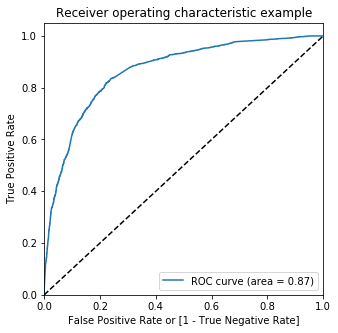

In [80]:
draw_roc(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

### Finding Optimal Cutoff Point

Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [81]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Convert_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.263941,1871,0,1,1,1,0,0,0,0,0,0,0
1,0,0.263353,6795,0,1,1,1,0,0,0,0,0,0,0
2,0,0.307559,3516,0,1,1,1,1,0,0,0,0,0,0
3,0,0.857083,8105,1,1,1,1,1,1,1,1,1,1,0
4,0,0.215999,3934,0,1,1,1,0,0,0,0,0,0,0


In [82]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.573748  0.973236  0.327586
0.2   0.2  0.712276  0.911192  0.589705
0.3   0.3  0.790507  0.820762  0.771864
0.4   0.4  0.798237  0.755069  0.824838
0.5   0.5  0.798856  0.671533  0.877311
0.6   0.6  0.774737  0.545012  0.916292
0.7   0.7  0.758658  0.459043  0.943278
0.8   0.8  0.733612  0.355231  0.966767
0.9   0.9  0.682127  0.184509  0.988756


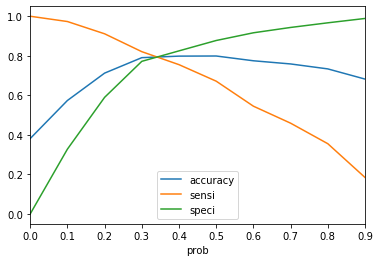

In [83]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

#### From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

In [84]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Convert_Prob.map( lambda x: 1 if x > 0.3 else 0)

y_train_pred_final.head()

,Convert,Convert_Prob,Prospect ID,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.263941,1871,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.263353,6795,0,1,1,1,0,0,0,0,0,0,0,0
2,0,0.307559,3516,0,1,1,1,1,0,0,0,0,0,0,1
3,0,0.857083,8105,1,1,1,1,1,1,1,1,1,1,0,1
4,0,0.215999,3934,0,1,1,1,0,0,0,0,0,0,0,0


In [85]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Convert, y_train_pred_final.final_predicted)

0.7905071119356833

In [86]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Convert, y_train_pred_final.final_predicted )
confusion2

array([[3089,  913],
       [ 442, 2024]], dtype=int64)

In [87]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [88]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.8207623682076237

In [89]:
# Let us calculate specificity
TN / float(TN+FP)

0.771864067966017

In [90]:
# Calculate false postive rate - predicting convert when customer does not have converted
print(FP/ float(TN+FP))

0.228135932033983


In [91]:
# Positive predictive value 
print (TP / float(TP+FP))

0.6891385767790262


In [92]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8748229963183234


### Precision and recall tradeoff

In [93]:
from sklearn.metrics import precision_recall_curve

In [94]:
y_train_pred_final.Convert, y_train_pred_final.predicted.head()

(0       0
 1       0
 2       0
 3       0
 4       0
        ..
 6463    1
 6464    1
 6465    1
 6466    0
 6467    0
 Name: Convert, Length: 6468, dtype: int64, 0    0
 1    0
 2    0
 3    1
 4    0
 Name: predicted, dtype: int64)

In [95]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Convert, y_train_pred_final.Convert_Prob)

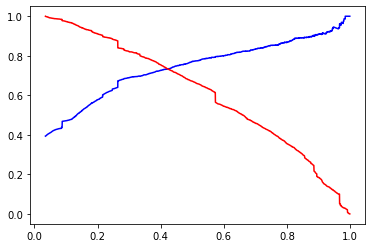

In [96]:
plt.plot(thresholds, p[:-1], "b-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Making predictions on the test set

In [97]:
scaler = StandardScaler()
X_test[['TotalVisits','Page Views Per Visit','Total Time Spent on Website']] = scaler.fit_transform(X_test[['TotalVisits',\
                                                                                                              'Page Views Per Visit','Total Time Spent on Website']])

X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Welingak Website,Last Activity_Email Opened,Last Activity_Had a Phone Conversation,Last Activity_SMS Sent,Last Notable Activity_Email Opened,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Unreachable
4269,0,0.933036,0,0,0,0,0,1,0,0,0,0,0
2376,0,-0.900812,0,1,0,0,0,1,0,0,0,0,0
7766,0,-0.793792,0,0,0,0,0,0,0,0,0,0,1
9199,0,-0.900812,1,0,0,0,0,0,0,0,1,0,0
4359,0,-0.900812,0,1,0,1,0,0,1,0,0,0,0


In [98]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [99]:
y_test_pred = res.predict(X_test_sm)

In [100]:
y_test_pred[:10]

4269    0.788243
2376    0.965981
7766    0.416709
9199    0.086218
4359    0.883555
9186    0.626149
1631    0.499667
8963    0.183543
8007    0.065467
5324    0.403959
dtype: float64

In [101]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [102]:
# Let's see the head
y_pred_1.head()

,0
4269,0.788243
2376,0.965981
7766,0.416709
9199,0.086218
4359,0.883555


In [103]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

# Putting CustID to index
y_test_df['Prospect ID'] = y_test_df.index

In [104]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [105]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [106]:
y_pred_final.head()

,Converted,Prospect ID,0
0,1,4269,0.788243
1,1,2376,0.965981
2,1,7766,0.416709
3,0,9199,0.086218
4,1,4359,0.883555


In [107]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [108]:
y_pred_final.head()

,Converted,Prospect ID,Convert_Prob
0,1,4269,0.788243
1,1,2376,0.965981
2,1,7766,0.416709
3,0,9199,0.086218
4,1,4359,0.883555


In [109]:
# Rearranging the columns
y_pred_final = y_pred_final[['Prospect ID','Converted','Convert_Prob']]

In [110]:
# Let's see the head of y_pred_final
y_pred_final.head()

,Prospect ID,Converted,Convert_Prob
0,4269,1,0.788243
1,2376,1,0.965981
2,7766,1,0.416709
3,9199,0,0.086218
4,4359,1,0.883555


In [111]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [112]:
y_pred_final.head()

,Prospect ID,Converted,Convert_Prob,final_predicted
0,4269,1,0.788243,1
1,2376,1,0.965981,1
2,7766,1,0.416709,1
3,9199,0,0.086218,0
4,4359,1,0.883555,1


In [118]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7988559059987631

In [114]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1410,  267],
       [ 276,  819]], dtype=int64)

In [115]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [116]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7479452054794521

In [117]:
# Let us calculate specificity
TN / float(TN+FP)

0.8407871198568873

Hence, we have got an accuracy of around 80% for our model.

Thank you for evaluating this presentation.